## Intro

We are working with the King County Housing dataset. Within the dataset, there are 21,597 entries with 21 columns. Our task is to predict the value of the house prices given the housing features.
We plan to go about our task by constructing a linear regression model.

## Libraries needed:

We start our project by importing a group of libraries that aid us in the creation of our regression model and visualisations. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib
matplotlib.__version__
import statistics as stat
import statsmodels.api as sm

We then imported our needed modules from sklearn and scipy these modules assist us in creating our regression

In [2]:
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.preprocessing import StandardScaler

We chose to increase our display size so that we are able to view more rows.

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## import original dataset:

we imported our original housing data set from a csv file provided to us from kaggle and utilised the pandas library to read it as a data frame.

In [4]:
ds = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/london-ds-010620/master/mod_1/project/kc_house_data.csv')
ds

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


we just imported a large dataset let us see what we are dealing with.

In [5]:
ds.shape

(21597, 21)

as stated above we are dealing with a dataset that contains 21,597 rows and 21 columns.

These are the names of our columns:

In [6]:
ds.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Our next step is to take a look at how the values within our data set are stored can be very helpful and allow us to operate on them accordingly. 

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


We notice that most of our data is in line with how we want it represented, except sqft_basement.

We then proceed to convert sqft_basement from an object into a float so we can utilize this data within our regression model.

In [24]:
ds_basement = ds[['sqft_basement']].transform(pd.to_numeric, errors='coerce')
ds[['sqft_basement']]= ds_basement




Now lets check if it worked:

In [25]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       19220 non-null float64
view             21533 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21142 non-null float64
yr_built         21596 non-null int64
yr_renovated     17754 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 4.2+ MB


## Data Cleaning!!

# Dropping the anomaly


In [26]:
ds.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159600e+04,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,19220.000000,21533.000000,21596.000000,21596.000000,21596.000000,21142.000000,21596.000000,17754.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,4.580575e+09,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.007596,0.233874,3.409752,7.657946,1788.631506,291.838095,1971.000787,83.641489,98077.950685,47.560087,-122.213977,1986.650722,12758.656649
std,2.876764e+09,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.086827,0.765702,0.650471,1.173218,827.763251,442.504364,29.375460,399.957185,53.514040,0.138552,0.140725,685.231768,27275.018316
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308950e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [27]:
ds.loc[ds['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


as we can see our max bedrooms on one of the properties is 33 this is likely due to a data entry error as 3 bedrooms would make more sense for that pricing and square footage.

So lets drop the outlier:

In [28]:
ds.drop(ds.loc[ds['bedrooms']==33].index, inplace=True)

In [29]:
# Dropping Duplicates
ds_test_set = ds
print(ds_test_set.columns)

ds_test_set = ds_test_set.sort_values('date').drop_duplicates('id', keep='first') 
ds_test_set.sort_values('id', ascending = True, inplace = True) 

print("Original number of entries:", len(ds))
print("Number of duplicated entries dropped:", len(ds)-len(ds_test_set))
print("Number of unique entries:", len(ds_test_set))

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
Original number of entries: 21596
Number of duplicated entries dropped: 177
Number of unique entries: 21419


In [30]:
ds.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159600e+04,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,19220.000000,21533.000000,21596.000000,21596.000000,21596.000000,21142.000000,21596.000000,17754.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,4.580575e+09,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.007596,0.233874,3.409752,7.657946,1788.631506,291.838095,1971.000787,83.641489,98077.950685,47.560087,-122.213977,1986.650722,12758.656649
std,2.876764e+09,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.086827,0.765702,0.650471,1.173218,827.763251,442.504364,29.375460,399.957185,53.514040,0.138552,0.140725,685.231768,27275.018316
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308950e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Dropping Missing Values

* We chose to zero out waterfront as not a large amount of properties in the dataset have been missrepresented and the remaining data for those fields seem ok to work with.

* 3,842 null values are represented in the yr renovated column. Instead of removing those entries, we thought it is best to just zero them out and make note when dealing with the index that we did that.

* We dealt with the view index by zeroing out the NaN values as it does not provide too much of hinderance to our data set doing so as there are only 63 NaN entries. If we decide to work with this index we will remove the entries since we don't want their binary value to be counted within the dataset. Providing a zero value gives us the ability to work with the remaining columns of data provided.

In [31]:
print("indexes with null values:", " \n" , ds.isnull().sum())

print("total number of nulls:", ds.isnull().sum().sum())

ds_clean = ds.dropna()
ds_clean.info()

print("DF shape with dropped nulls:", ds_clean.shape)
print('DF shape without dropped nulls:', ds.shape)

indexes with null values:  
 id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64
total number of nulls: 6735
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15428 entries, 1 to 21596
Data columns (total 21 columns):
id               15428 non-null int64
date             15428 non-null object
price            15428 non-null float64
bedrooms         15428 non-null int64
bathrooms        15428 non-null float64
sqft_living      15428 non-null int64
sqft_lot         15428 non-null int64
floors           15428 non-null float64
waterfront       15428 non-null float64
view    

# Zeroing Missing Values


In [32]:
print(ds.isnull().sum().sum())
print(ds.shape)

6735
(21596, 21)


**there are a total of 6,281 NaN values in our data set** <br>
lets zero them out:

In [33]:
ds_nonull = ds.fillna(method ='ffill')
ds_nonull.isnull().sum()
ds_nonull.shape

(21596, 21)

# Cross-Correlation Map
We have created this correlation matrix to give us an idea of which variabled we want to work with for our regression model.

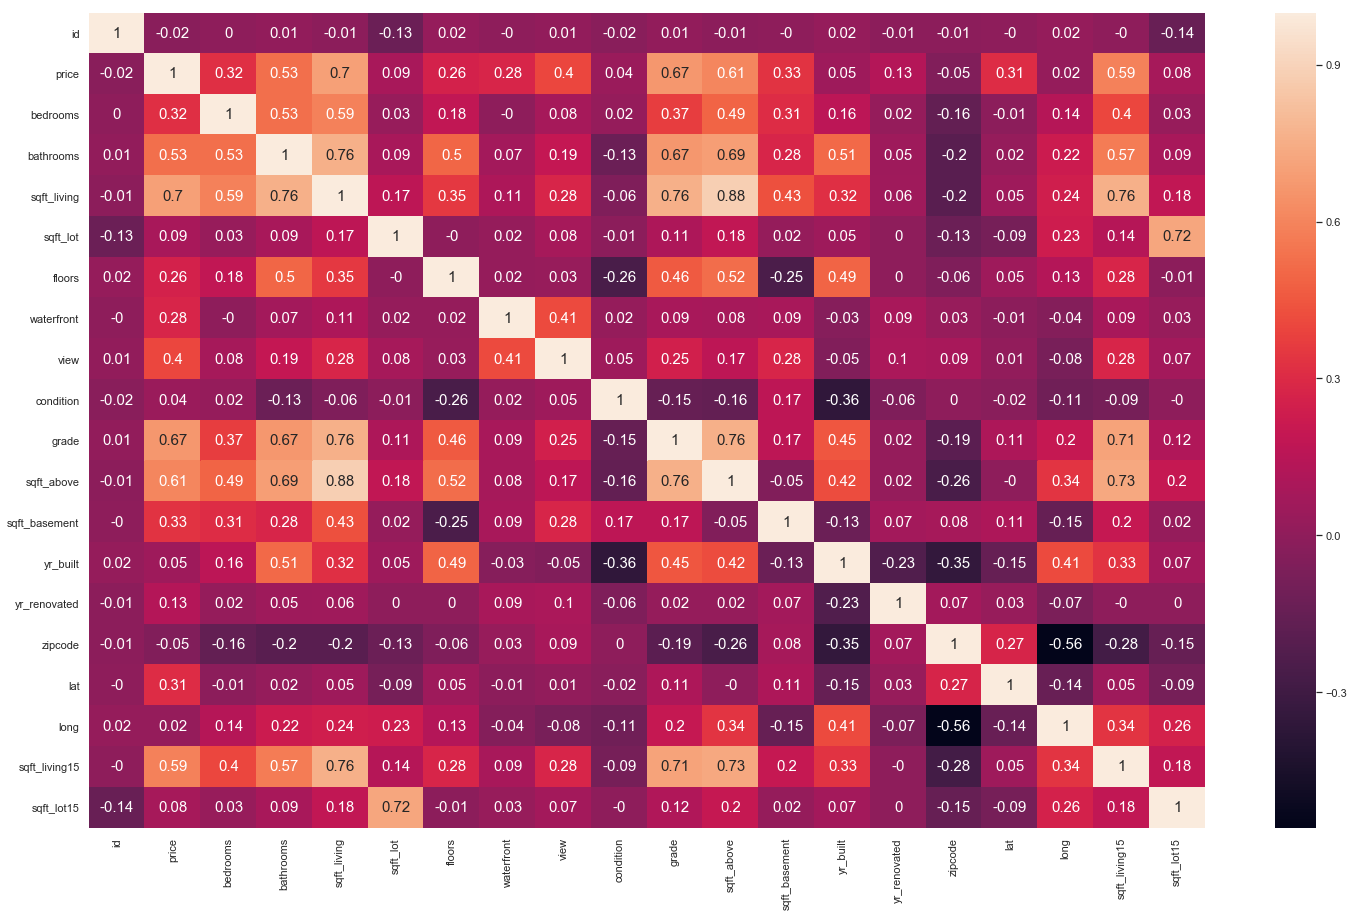

In [34]:
kc_heat_map = ds.corr().round(2)
sns.set(rc={'figure.figsize':(25, 15)})
sns.heatmap(data=kc_heat_map, annot=True, annot_kws={"size": 15})
plt.show()

ValueError: max must be larger than min in range parameter.

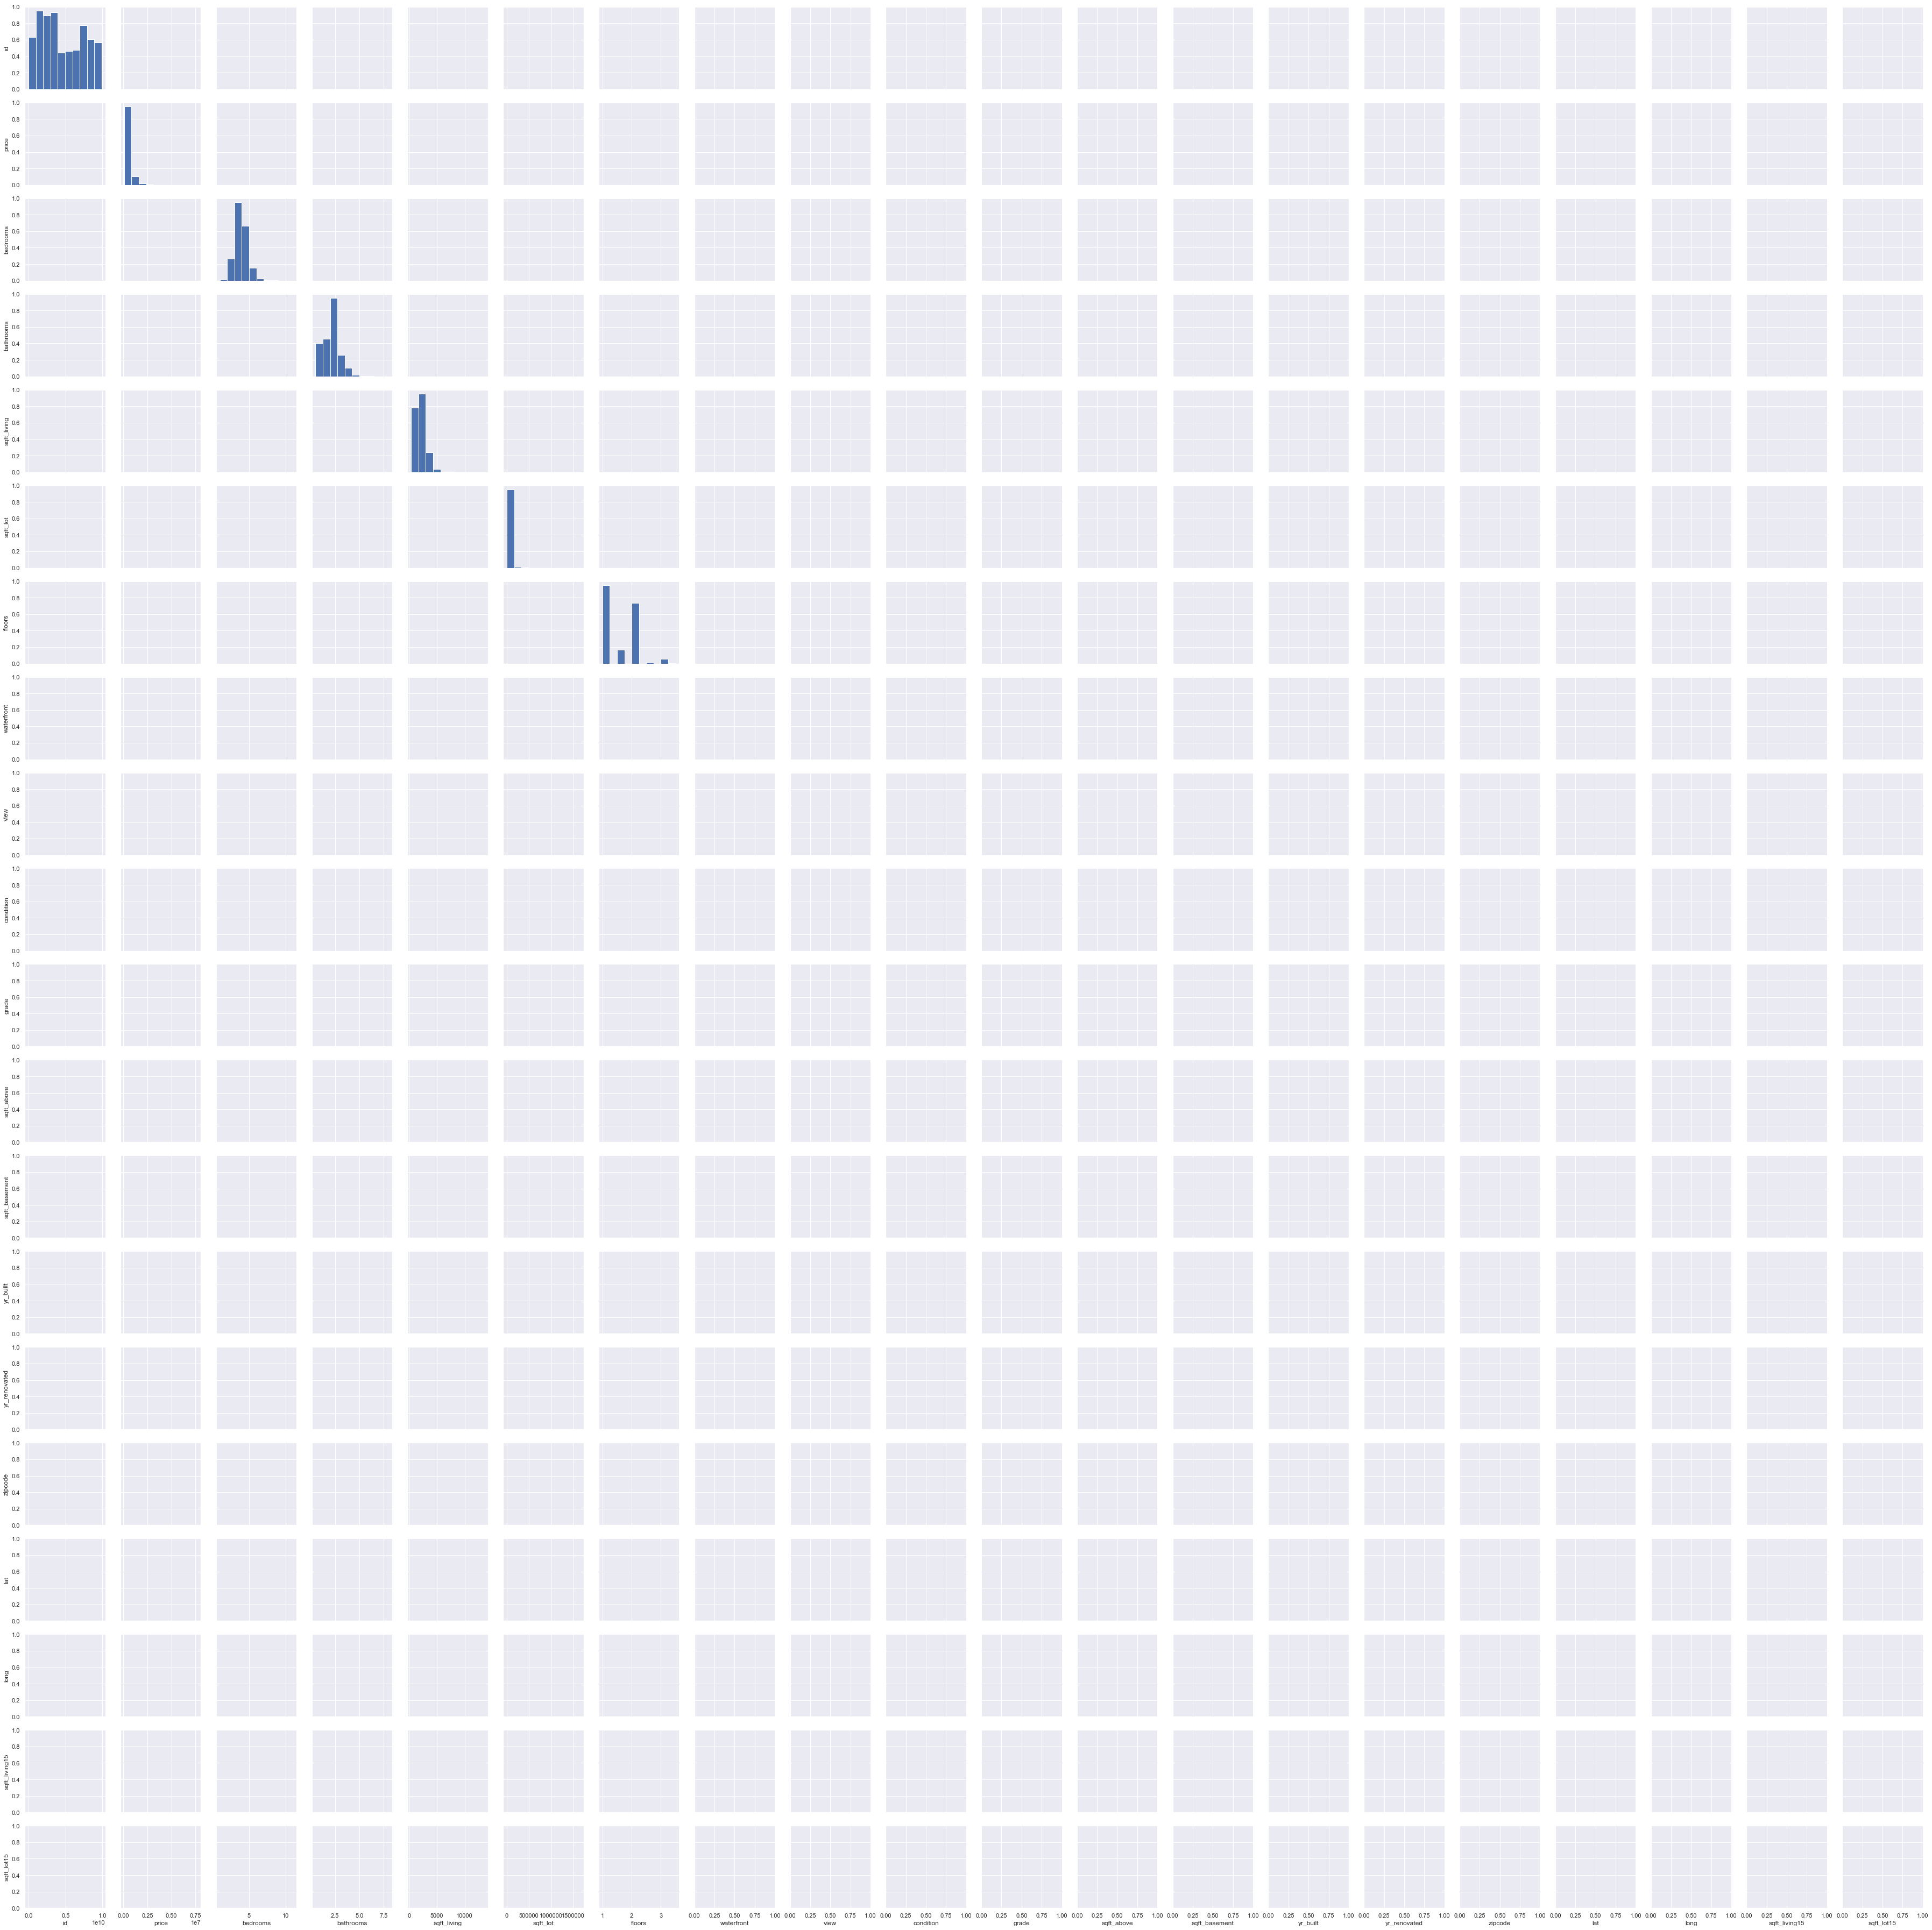

In [35]:
sns.pairplot(ds)


# What is the effect of the bedroom and bathroom variables on price?

To tackle our question on the importance of bedrooms and bathrooms in comparison to price, we started by comparing our variables individually.  

# Bedrooms:

We compared bedrooms to price and the trend was generally the same. The visualisations revealed that there are large amounts of properties at different price ranges with many rooms.

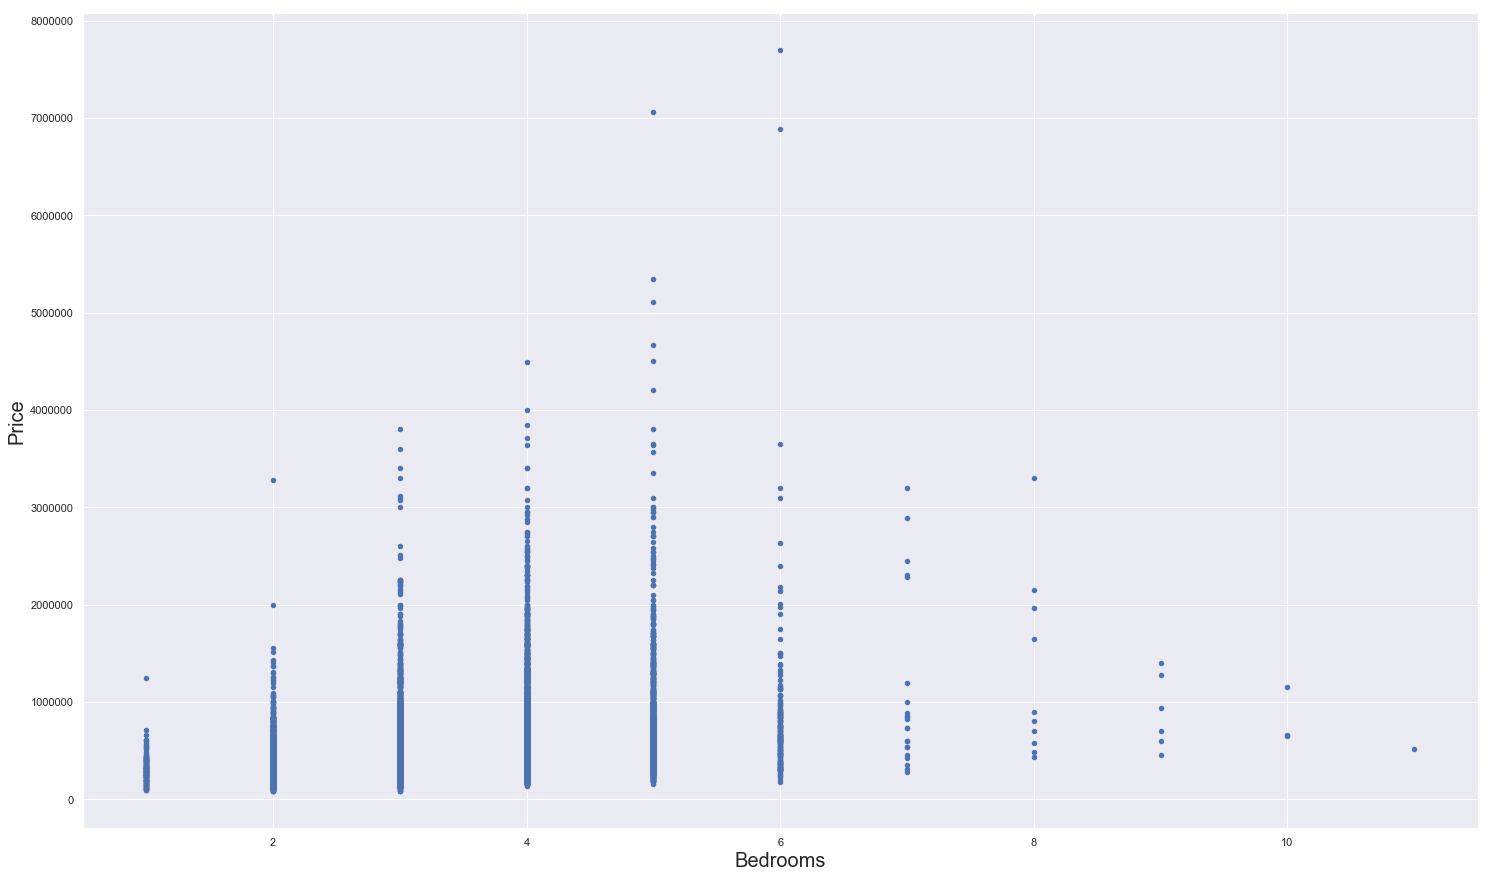

In [36]:
ds_clean.reset_index().plot.scatter(x='bedrooms', y='price')
plt.xlabel('Bedrooms', size=20)
plt.ylabel('Price', size=20)
plt.show()

In [37]:
x = ds_clean[['bedrooms','sqft_lot', 'waterfront', 'grade', 'sqft_basement']]
y = ds_clean['price']
x_array = x.to_numpy()
y_array = y.to_numpy()
regression_features = LinearRegression(fit_intercept=True, normalize=False, n_jobs=-1, copy_X =True)
regress = regression_features.fit(x, y)

In [38]:
X = sm.add_constant(x)
model_sm = sm.OLS(y,X)

results = model_sm.fit()

r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

est_b = results.params
print(est_b.round(4))

R2 = 0.53
const           -1.027300e+06
bedrooms         1.484604e+04
sqft_lot         8.560000e-02
waterfront       8.994407e+05
grade            1.910078e+05
sqft_basement    1.598965e+02
dtype: float64


/Users/paulwilliams/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [39]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     3474.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:44:41   Log-Likelihood:            -2.1400e+05
No. Observations:               15428   AIC:                         4.280e+05
Df Residuals:                   15422   BIC:                         4.281e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.027e+06   1.41e+04    -73.015      0.000   -1.05e+06      -1e+06
bedrooms       1.485e+04   2553.465      5.814      0.000    9840.944    1.99e+04
sqft_lot          0.0856      0.049      1.734      0.083      -0.011       0.182
waterfront     8.994e+05    2.4e+04     37.405      0.000    8.52e+05    9.47e+05
grade           1.91e+05   1908.170    100.100      0.000    1.87e+05    1.95e+05
sqft_basement   159.8965      4.917     32.522      0.000     150.259     169.533
==============================================================================
Omnibus:                    13570.538   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1469394.037
Skew:                           3.748   Prob(JB):                         0.00
Kurtosis:                      50.219   Cond. No.                     5.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Bathrooms:

We compared bathrooms to price and noticed a positive correlation with a wide distribution of price ranges to bedrooms. 

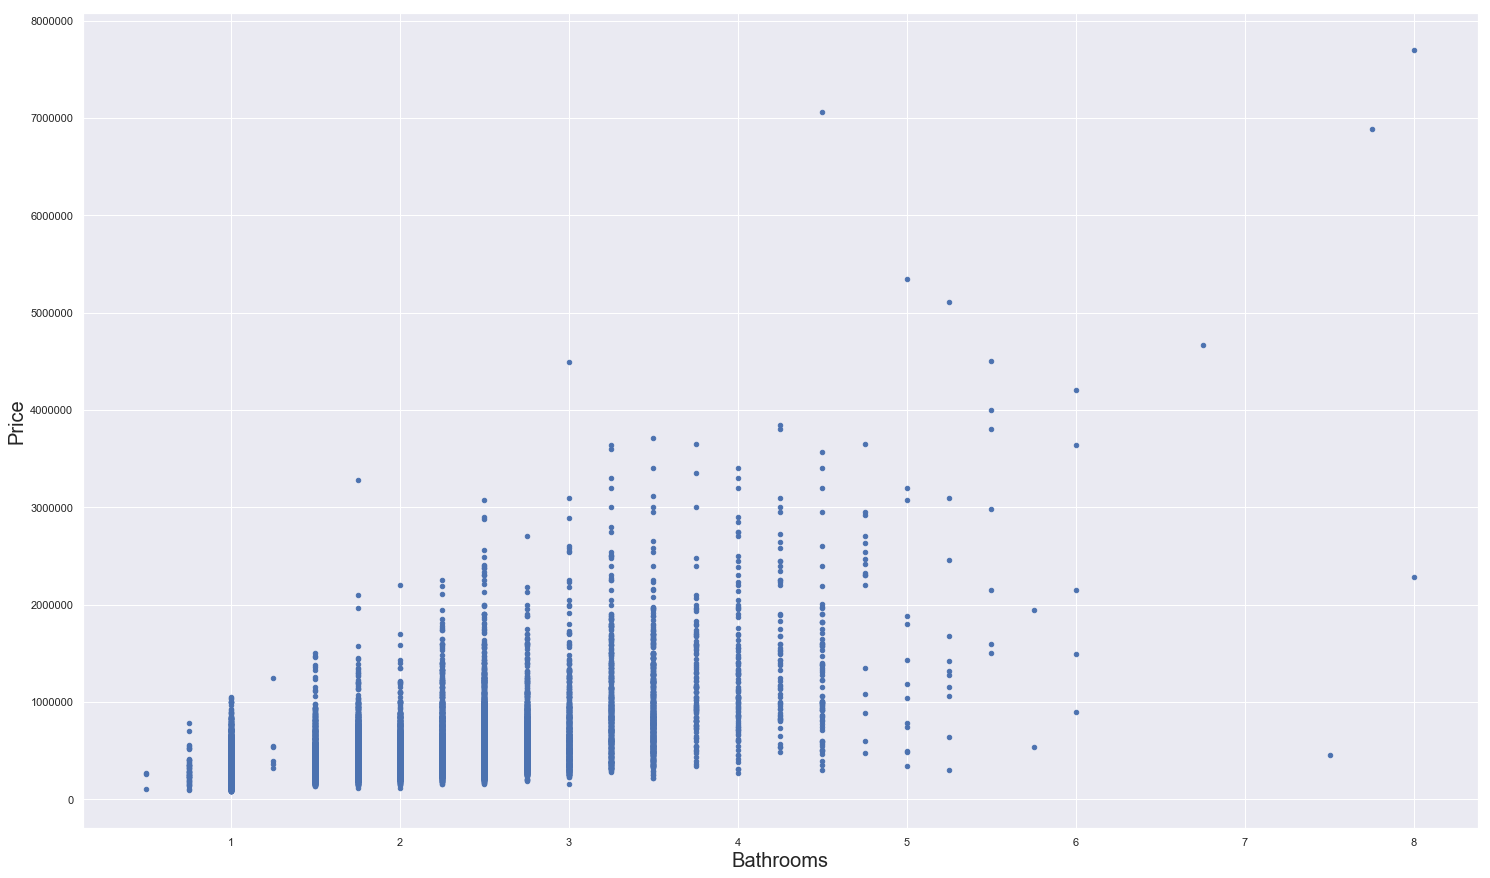

In [40]:
ds_clean.reset_index().plot.scatter(x='bathrooms', y='price')
plt.xlabel('Bathrooms', size=20)
plt.ylabel('Price', size=20)
plt.show()

In [41]:
x = ds_clean[['bathrooms','sqft_lot', 'waterfront', 'grade', 'sqft_basement']]
y = ds_clean['price']
x_array = x.to_numpy()
y_array = y.to_numpy()
regression_features = LinearRegression(fit_intercept=True, normalize=False, n_jobs=-1, copy_X =True)
regress = regression_features.fit(x, y)

In [42]:
X = sm.add_constant(x)
model_sm = sm.OLS(y,X)

results = model_sm.fit()

r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

est_b = results.params
print(est_b.round(4))

R2 = 0.53
const           -957791.0345
bathrooms         43820.7795
sqft_lot              0.0752
waterfront       892003.9404
grade            176580.7072
sqft_basement       154.5664
dtype: float64


/Users/paulwilliams/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [43]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     3520.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:44:57   Log-Likelihood:            -2.1395e+05
No. Observations:               15428   AIC:                         4.279e+05
Df Residuals:                   15422   BIC:                         4.280e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.578e+05   1.43e+04    -67.067      0.000   -9.86e+05    -9.3e+05
bathrooms      4.382e+04   3683.660     11.896      0.000    3.66e+04     5.1e+04
sqft_lot          0.0752      0.049      1.528      0.126      -0.021       0.172
waterfront      8.92e+05   2.39e+04     37.291      0.000    8.45e+05    9.39e+05
grade          1.766e+05   2353.389     75.033      0.000    1.72e+05    1.81e+05
sqft_basement   154.5664      4.839     31.944      0.000     145.082     164.051
==============================================================================
Omnibus:                    13315.552   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1333125.220
Skew:                           3.656   Prob(JB):                         0.00
Kurtosis:                      47.949   Cond. No.                     5.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Combined bed and bath into rooms

In [44]:
ds_clean['rooms']= ds_clean['bedrooms'] + ds_clean['bathrooms']

/Users/paulwilliams/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Based off our correlation matrix, we knew that the variables bedroom and bathroom were highly correlated with other variables such as square foot living space, square foot above, etc. To avoid problems with multicollinearity we decided to combine the variables bedroom and bathroom into one variable called rooms. 

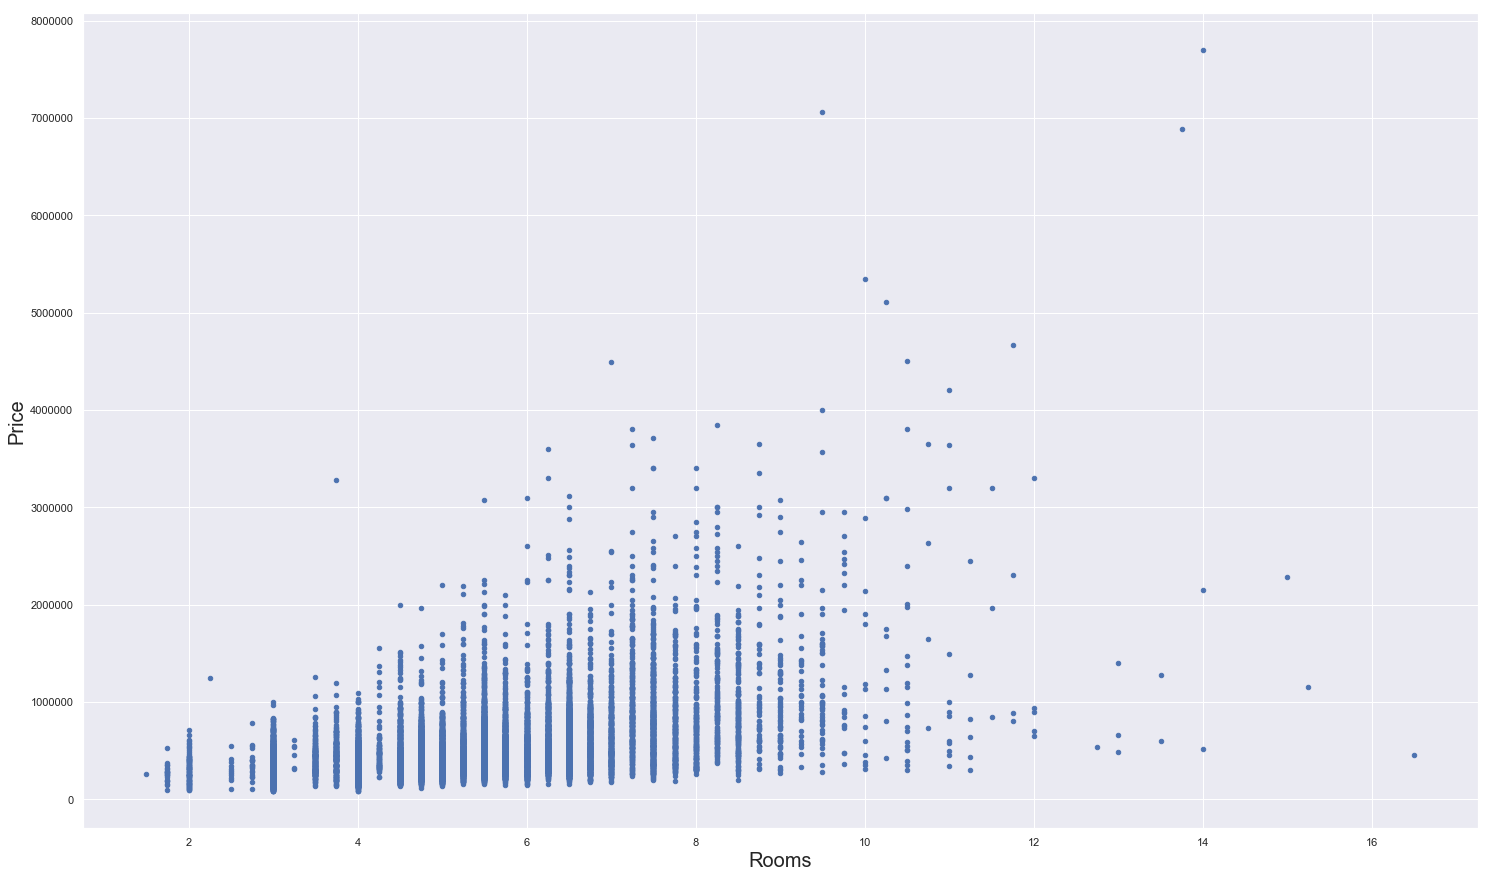

In [45]:
ds_clean.reset_index().plot.scatter(x='rooms', y='price')
plt.xlabel('Rooms', size=20)
plt.ylabel('Price', size=20)
plt.show()

In [46]:
x = ds_clean[['rooms','sqft_lot', 'waterfront', 'grade', 'sqft_basement']]
y = ds_clean['price']
x_array = x.to_numpy()
y_array = y.to_numpy()
regression_features = LinearRegression(fit_intercept=True, normalize=False, n_jobs=-1, copy_X =True)
regress = regression_features.fit(x, y)

In [47]:
X = sm.add_constant(x)
model_sm = sm.OLS(y,X)

results = model_sm.fit()

r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

est_b = results.params
print(est_b.round(4))

R2 = 0.53
const           -1.010602e+06
rooms            1.794908e+04
sqft_lot         8.380000e-02
waterfront       9.015528e+05
grade            1.827638e+05
sqft_basement    1.528349e+02
dtype: float64


/Users/paulwilliams/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [48]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     3502.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:45:02   Log-Likelihood:            -2.1397e+05
No. Observations:               15428   AIC:                         4.280e+05
Df Residuals:                   15422   BIC:                         4.280e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.011e+06   1.37e+04    -73.999      0.000   -1.04e+06   -9.84e+05
rooms          1.795e+04   1805.350      9.942      0.000    1.44e+04    2.15e+04
sqft_lot          0.0838      0.049      1.702      0.089      -0.013       0.180
waterfront     9.016e+05    2.4e+04     37.602      0.000    8.55e+05    9.49e+05
grade          1.828e+05   2160.426     84.596      0.000    1.79e+05    1.87e+05
sqft_basement   152.8349      4.950     30.878      0.000     143.133     162.537
==============================================================================
Omnibus:                    13472.087   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1415453.785
Skew:                           3.712   Prob(JB):                         0.00
Kurtosis:                      49.333   Cond. No.                     5.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Findings

The visualisations reveal that there are a large amount of properties at different price ranges with many rooms. If amount of rooms is a deciding factor for our client, then we can tailor their search to best fit their budget.

# Question 2:


In [49]:
# Niels's Question
ds_clean['rooms']= ds_clean['bedrooms'] + ds_clean['bathrooms']
zip_grade = ds[['price', 'grade','zipcode']]
zip_grade_df = pd.DataFrame(zip_grade)

/Users/paulwilliams/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
ds_zipanal = pd.DataFrame(ds)
ds_zipanal = ds_zipanal.groupby(by = ['zipcode'])
ds_zipanal.mean()['price']
uzips = ds_zipanal.zipcode.unique()
ds_zips_price = ds_zipanal.mean()


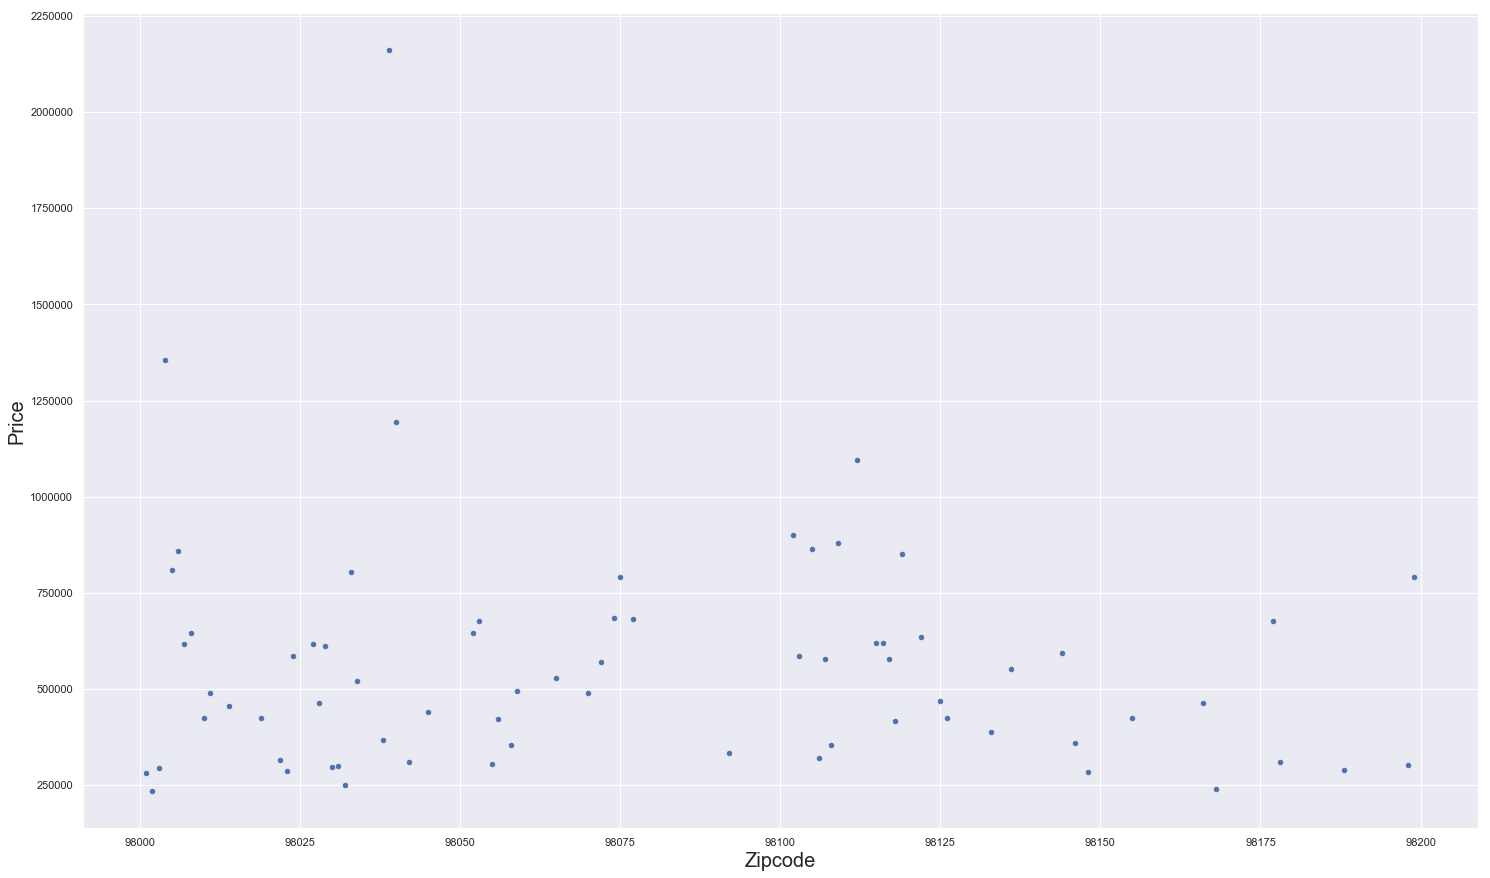

In [51]:
ds_zips_price.price.reset_index().plot.scatter(x='zipcode', y='price')
plt.xlabel('Zipcode', size=20)
plt.ylabel('Price', size=20)
plt.show()

In [52]:
# Median house price sale was $370 000 in Jan 2014 and $422 000 in Dec 2015 according to Zillow
ds.median()
# our median is $450 000
ds_zips_price_q = pd.qcut(ds_zips_price['price'], [0, .25, .5, .75, 1], labels = ['4th', '3rd', '2nd', '1st'])

topzips_f = ds_zips_price_q.loc[ds_zips_price_q == "1st"]
topzips1 = topzips_f.reset_index()
topzips = topzips1.zipcode.unique()
topzip = ds_clean[ds_clean['zipcode'].isin(topzips)]


In [53]:
# Median house price sale was $370 000 in Jan 2014 and $422 000 in Dec 2015 according to Zillow
ds.median()
# our median is $450 000
ds_zips_price_q = pd.qcut(ds_zips_price['price'], [0, .25, .5, .75, 1], labels = ['4th', '3rd', '2nd', '1st'])

# theoretical top quartile regression
topzips_f = ds_zips_price_q.loc[ds_zips_price_q == "1st"]
topzips1 = topzips_f.reset_index()
topzips = topzips1.zipcode.unique()
topzip = ds_clean[ds_clean['zipcode'].isin(topzips)]

x_tz = topzip[['rooms', 'sqft_lot', 'waterfront', 'grade', 'sqft_living', 'yr_built']]
y_tz = topzip['price']
# Setting up the LEARNER
X = sm.add_constant(x_tz)
model_sm = sm.OLS(y_tz,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))
results.summary()

R2 = 0.68
const          7.628645e+06
rooms         -1.125533e+04
sqft_lot      -1.623200e+00
waterfront     1.153120e+06
grade          1.021554e+05
sqft_living    2.988767e+02
yr_built      -4.217481e+03
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     1217.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:45:09   Log-Likelihood:                -49396.
No. Observations:                3517   AIC:                         9.881e+04
Df Residuals:                    3510   BIC:                         9.885e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.629e+06   3.74e+05     20.378      0.000    6.89e+06    8.36e+06
rooms       -1.126e+04   5290.076     -2.128      0.033   -2.16e+04    -883.399
sqft_lot       -1.6232      0.200     -8.131      0.000      -2.015      -1.232
waterfront   1.153e+06   5.13e+04     22.481      0.000    1.05e+06    1.25e+06
grade        1.022e+05   6579.933     15.525      0.000    8.93e+04    1.15e+05
sqft_living   298.8767      9.636     31.016      0.000     279.983     317.770
yr_built    -4217.4814    197.277    -21.378      0.000   -4604.270   -3830.692
==============================================================================
Omnibus:                     2052.559   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48078.834
Skew:                           2.320   Prob(JB):                         0.00
Kurtosis:                      20.509   Cond. No.                     2.24e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# top quartile stepwise selection
X_step = topzip
X_step_clean = X_step.drop(columns = ['price', 'id', 'date', 'lat', 'long', 'zipcode','bathrooms', 'bedrooms'])
y_step = list(topzip['price'])
def stepwise_selection(X_step_clean, y_step, 
                       initial_list=[], 
                       threshold_in=0.0000001, 
                       threshold_out = 0.005, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X_step_clean.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y_step, sm.add_constant(pd.DataFrame(X_step_clean[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y_step, sm.add_constant(pd.DataFrame(X_step_clean[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X_step_clean, X_step['price'], verbose=True)
print('resulting features:')
print(result)


Add  grade                          with p-value 0.0
Add  sqft_living                    with p-value 7.69632e-244
Add  waterfront                     with p-value 1.67359e-101
Add  yr_built                       with p-value 3.61878e-100
Add  view                           with p-value 2.91791e-17
Add  sqft_lot15                     with p-value 6.25311e-16
resulting features:
['grade', 'sqft_living', 'waterfront', 'yr_built', 'view', 'sqft_lot15']


In [55]:
# top quartile stepwise regression
topzips_f = ds_zips_price_q.loc[ds_zips_price_q == "1st"]
topzips1 = topzips_f.reset_index()
topzips = topzips1.zipcode.unique()
topzip = ds_clean[ds_clean['zipcode'].isin(topzips)]

x_tz = topzip[['grade', 'sqft_living', 'waterfront', 'yr_built', 'view', 'sqft_lot15']]
y_tz = topzip['price']
# Setting up the LEARNER
X = sm.add_constant(x_tz)
model_sm = sm.OLS(y_tz,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))
results.summary()

R2 = 0.68
const          7.113269e+06
grade          9.943311e+04
sqft_living    2.751018e+02
waterfront     1.018827e+06
yr_built      -3.954156e+03
view           5.002643e+04
sqft_lot15    -2.175500e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     1253.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:45:10   Log-Likelihood:                -49361.
No. Observations:                3517   AIC:                         9.874e+04
Df Residuals:                    3510   BIC:                         9.878e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.113e+06   3.75e+05     18.952      0.000    6.38e+06    7.85e+06
grade        9.943e+04   6518.502     15.254      0.000    8.67e+04    1.12e+05
sqft_living   275.1018      7.518     36.592      0.000     260.361     289.842
waterfront   1.019e+06   5.39e+04     18.905      0.000    9.13e+05    1.12e+06
yr_built    -3954.1561    197.537    -20.017      0.000   -4341.455   -3566.857
view         5.003e+04   6134.179      8.155      0.000     3.8e+04    6.21e+04
sqft_lot15     -2.1755      0.268     -8.123      0.000      -2.701      -1.650
==============================================================================
Omnibus:                     2100.510   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52940.908
Skew:                           2.373   Prob(JB):                         0.00
Kurtosis:                      21.405   Cond. No.                     1.76e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
# theoretical bottom quartile regression
botzips_f = ds_zips_price_q.loc[ds_zips_price_q == "4th"]
botzips1 = botzips_f.reset_index()
botzips = botzips1.zipcode.unique()
botzip = ds_clean[ds_clean['zipcode'].isin(botzips)]

x_tz = botzip[['rooms', 'sqft_basement', 'sqft_lot', 'waterfront', 'grade', 'sqft_living', 'yr_built']]
y_tz = botzip['price']
# Setting up the LEARNER
X = sm.add_constant(x_tz)
model_sm = sm.OLS(y_tz,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))
results.summary()

R2 = 0.68
const            410915.8977
rooms             -3157.5844
sqft_basement       -13.7096
sqft_lot              0.4833
waterfront       458891.3368
grade             28370.1934
sqft_living          93.7506
yr_built           -243.7253
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     1111.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:45:11   Log-Likelihood:                -46443.
No. Observations:                3720   AIC:                         9.290e+04
Df Residuals:                    3712   BIC:                         9.295e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.109e+05   1.12e+05      3.685      0.000    1.92e+05     6.3e+05
rooms         -3157.5844   1261.068     -2.504      0.012   -5630.038    -685.131
sqft_basement   -13.7096      3.208     -4.273      0.000     -20.000      -7.419
sqft_lot          0.4833      0.022     22.353      0.000       0.441       0.526
waterfront     4.589e+05   1.61e+04     28.437      0.000    4.27e+05    4.91e+05
grade          2.837e+04   1791.567     15.835      0.000    2.49e+04    3.19e+04
sqft_living      93.7506      2.879     32.568      0.000      88.107      99.394
yr_built       -243.7253     59.395     -4.103      0.000    -360.175    -127.275
==============================================================================
Omnibus:                     1844.941   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40136.326
Skew:                           1.865   Prob(JB):                         0.00
Kurtosis:                      18.653   Cond. No.                     5.56e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
# bottom quartile stepwise selection
X_step2 = botzip
X_step_clean2 = X_step2.drop(columns = ['price', 'id', 'sqft_basement', 'date', 'lat', 'long', 'zipcode','bathrooms', 'bedrooms'])
y_step2 = list(botzip['price'])
def stepwise_selection(X_step_clean2, y_step2, 
                       initial_list=[], 
                       threshold_in=0.0000001, 
                       threshold_out = 0.005, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X_step_clean2.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y_step2, sm.add_constant(pd.DataFrame(X_step_clean2[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y_step2, sm.add_constant(pd.DataFrame(X_step_clean2[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X_step_clean2, X_step2['price'], verbose=True)
print('resulting features:')
print(result)


Add  sqft_living15                  with p-value 0.0
Add  sqft_living                    with p-value 1.46795e-286
Add  waterfront                     with p-value 2.57346e-134
Add  sqft_lot                       with p-value 1.83189e-101
Add  grade                          with p-value 7.2646e-50
Drop sqft_living15                  with p-value 0.131475
Add  view                           with p-value 8.74495e-34
Add  yr_renovated                   with p-value 4.0697e-09
resulting features:
['sqft_living', 'waterfront', 'sqft_lot', 'grade', 'view', 'yr_renovated']


/Users/paulwilliams/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


['sqft_living', 'waterfront', 'sqft_lot', 'grade', 'view', 'yr_renovated']


['grade', 'sqft_living', 'waterfront', 'yr_built', 'view', 'sqft_lot15']

In [58]:
# bottom quartile stepwise regression
botzips_f = ds_zips_price_q.loc[ds_zips_price_q == "4th"]
botzips1 = botzips_f.reset_index()
botzips = botzips1.zipcode.unique()
botzip = ds_clean[ds_clean['zipcode'].isin(botzips)]

x_tz = botzip[['sqft_living', 'waterfront', 'sqft_lot', 'grade', 'view', 'yr_renovated']]
y_tz = botzip['price']
# Setting up the LEARNER
X = sm.add_constant(x_tz)
model_sm = sm.OLS(y_tz,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))
results.summary()

R2 = 0.69
const           -65625.1939
sqft_living         80.5128
waterfront      359166.2514
sqft_lot             0.4429
grade            27908.7638
view             24777.4314
yr_renovated        20.4302
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     1369.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:45:12   Log-Likelihood:                -46373.
No. Observations:                3720   AIC:                         9.276e+04
Df Residuals:                    3713   BIC:                         9.280e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.563e+04   9160.977     -7.164      0.000   -8.36e+04   -4.77e+04
sqft_living     80.5128      2.125     37.891      0.000      76.347      84.679
waterfront    3.592e+05   1.76e+04     20.414      0.000    3.25e+05    3.94e+05
sqft_lot         0.4429      0.021     20.622      0.000       0.401       0.485
grade         2.791e+04   1578.283     17.683      0.000    2.48e+04     3.1e+04
view          2.478e+04   2002.949     12.370      0.000    2.09e+04    2.87e+04
yr_renovated    20.4302      3.465      5.895      0.000      13.636      27.225
==============================================================================
Omnibus:                     1888.460   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46251.137
Skew:                           1.889   Prob(JB):                         0.00
Kurtosis:                      19.856   Cond. No.                     8.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Main regression model:

With this model we decided on the 4 independent variables: rooms, sqft_lot, waterfront, grade, and sqft_basement.

In [59]:
x = ds_clean[['yr_built', 'sqft_lot', 'waterfront', 'grade', 'sqft_basement']]
y = ds_clean['price']
x_array = x.to_numpy()
y_array = y.to_numpy()
regression_features = LinearRegression(fit_intercept=True, normalize=False, n_jobs=-1, copy_X =True)
regress = regression_features.fit(x, y)

In [60]:

X = sm.add_constant(x)
model_sm = sm.OLS(y,X)


results = model_sm.fit()


r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))


est_b = results.params
print(est_b.round(4))

R2 = 0.58
const            5.037989e+06
yr_built        -3.210807e+03
sqft_lot         9.060000e-02
waterfront       8.421451e+05
grade            2.333657e+05
sqft_basement    1.238458e+02
dtype: float64


/Users/paulwilliams/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [61]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     4205.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:45:13   Log-Likelihood:            -2.1319e+05
No. Observations:               15428   AIC:                         4.264e+05
Df Residuals:                   15422   BIC:                         4.264e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.038e+06   1.45e+05     34.771      0.000    4.75e+06    5.32e+06
yr_built      -3210.8066     76.634    -41.898      0.000   -3361.017   -3060.596
sqft_lot          0.0906      0.047      1.935      0.053      -0.001       0.182
waterfront     8.421e+05   2.28e+04     36.938      0.000    7.97e+05    8.87e+05
grade          2.334e+05   1935.233    120.588      0.000     2.3e+05    2.37e+05
sqft_basement   123.8458      4.604     26.901      0.000     114.822     132.870
==============================================================================
Omnibus:                    13958.948   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1782010.232
Skew:                           3.875   Prob(JB):                         0.00
Kurtosis:                      55.077   Cond. No.                     3.31e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""